In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Read regression dataset

housing_reg = fetch_california_housing()

In [3]:
num_epochs_reg = 20
rmse_reg = pd.DataFrame()

In [4]:
# Split into train, val and test set

X_train, X_test, y_train, y_test = train_test_split(housing_reg.data, housing_reg.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
X_train[0]

array([   4.7069    ,   27.        ,    6.52325581,    1.11627907,
        873.        ,    3.38372093,   38.        , -120.97      ])

In [6]:
# Model with default initialization - xavier uniform

model_reg = tf.keras.Sequential()
for _ in range(5):
    model_reg.add(tf.keras.layers.Dense(100, activation='relu'))
model_reg.add(tf.keras.layers.Dense(1))

# Compile model
model_reg.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg = model_reg.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_rmse', 'val_root_mean_squared_error':'val_rmse'})

Epoch 1/20
413/413 [==============================] - 11s 5ms/step - loss: 16.3044 - root_mean_squared_error: 4.0379 - val_loss: 1.5135 - val_root_mean_squared_error: 1.2302
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 11.1536 - root_mean_squared_error: 3.3397 - val_loss: 2.1215 - val_root_mean_squared_error: 1.4565
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 3.0091 - root_mean_squared_error: 1.7347 - val_loss: 1.6601 - val_root_mean_squared_error: 1.2885
Epoch 4/20
413/413 [==============================] - 2s 5ms/step - loss: 1.6024 - root_mean_squared_error: 1.2659 - val_loss: 1.1964 - val_root_mean_squared_error: 1.0938
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3761 - root_mean_squared_error: 1.1731 - val_loss: 1.3491 - val_root_mean_squared_error: 1.1615
Epoch 6/20
413/413 [==============================] - 2s 6ms/step - loss: 1.0125 - root_mean_squared_error: 1.0062 - val_loss: 0.8761 - v

In [7]:
# Model with LeCun Normal initialization 

model_reg_lecun_normal = tf.keras.Sequential()
for _ in range(5):
    model_reg_lecun_normal.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='lecun_normal'))
model_reg_lecun_normal.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_lecun_normal.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_lecun_normal = model_reg_lecun_normal.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_lecun_normal.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_lecun_normal_rmse', 'val_root_mean_squared_error':'val_lecun_normal_rmse'})

Epoch 1/20
413/413 [==============================] - 5s 5ms/step - loss: 178.0530 - root_mean_squared_error: 13.3436 - val_loss: 1.5774 - val_root_mean_squared_error: 1.2560
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 3.2158 - root_mean_squared_error: 1.7933 - val_loss: 1.4950 - val_root_mean_squared_error: 1.2227
Epoch 3/20
413/413 [==============================] - 3s 6ms/step - loss: 1.5660 - root_mean_squared_error: 1.2514 - val_loss: 2.2303 - val_root_mean_squared_error: 1.4934
Epoch 4/20
413/413 [==============================] - 2s 5ms/step - loss: 2.3226 - root_mean_squared_error: 1.5240 - val_loss: 1.6691 - val_root_mean_squared_error: 1.2919
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 2.7517 - root_mean_squared_error: 1.6588 - val_loss: 1.1093 - val_root_mean_squared_error: 1.0532
Epoch 6/20
413/413 [==============================] - 2s 5ms/step - loss: 1.5337 - root_mean_squared_error: 1.2384 - val_loss: 3.7876 - v

In [8]:
# Model with LeCun Uniform initialization 

model_reg_lecun_uniform = tf.keras.Sequential()
for _ in range(5):
    model_reg_lecun_uniform.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='lecun_uniform'))
model_reg_lecun_uniform.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_lecun_uniform.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_lecun_uniform = model_reg_lecun_uniform.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_lecun_uniform.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_lecun_uniform_rmse', 'val_root_mean_squared_error':'val_lecun_uniform_rmse'})
     

Epoch 1/20
413/413 [==============================] - 5s 5ms/step - loss: 257.1697 - root_mean_squared_error: 16.0365 - val_loss: 1.7167 - val_root_mean_squared_error: 1.3102
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 3.2961 - root_mean_squared_error: 1.8155 - val_loss: 1.2610 - val_root_mean_squared_error: 1.1229
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 1.8124 - root_mean_squared_error: 1.3462 - val_loss: 1.5149 - val_root_mean_squared_error: 1.2308
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 3.3015 - root_mean_squared_error: 1.8170 - val_loss: 5.2472 - val_root_mean_squared_error: 2.2907
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 1.5065 - root_mean_squared_error: 1.2274 - val_loss: 1.2350 - val_root_mean_squared_error: 1.1113
Epoch 6/20
413/413 [==============================] - 2s 6ms/step - loss: 6.5225 - root_mean_squared_error: 2.5539 - val_loss: 2.2820 - v

In [9]:
# Model with He normal initialization 

model_reg_he_normal = tf.keras.Sequential()
for _ in range(5):
    model_reg_he_normal.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model_reg_he_normal.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_he_normal.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_he_normal = model_reg_he_normal.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_he_normal.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_he_normal_rmse', 'val_root_mean_squared_error':'val_he_normal_rmse'})
     

Epoch 1/20
413/413 [==============================] - 5s 6ms/step - loss: 3391.4617 - root_mean_squared_error: 58.2363 - val_loss: 3.0396 - val_root_mean_squared_error: 1.7435
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 4.5819 - root_mean_squared_error: 2.1405 - val_loss: 12.8251 - val_root_mean_squared_error: 3.5812
Epoch 3/20
413/413 [==============================] - 2s 5ms/step - loss: 210.1837 - root_mean_squared_error: 14.4977 - val_loss: 9.3381 - val_root_mean_squared_error: 3.0558
Epoch 4/20
413/413 [==============================] - 2s 5ms/step - loss: 618.4258 - root_mean_squared_error: 24.8682 - val_loss: 35.5638 - val_root_mean_squared_error: 5.9635
Epoch 5/20
413/413 [==============================] - 2s 5ms/step - loss: 43.0735 - root_mean_squared_error: 6.5630 - val_loss: 1.7626 - val_root_mean_squared_error: 1.3276
Epoch 6/20
413/413 [==============================] - 3s 7ms/step - loss: 2.7530 - root_mean_squared_error: 1.6592 - val_loss: 

In [10]:
# Model with He Uniform initialization 

model_reg_he_uniform = tf.keras.Sequential()
for _ in range(5):
    model_reg_he_uniform.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_reg_he_uniform.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_he_uniform.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_he_uniform = model_reg_he_uniform.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_he_uniform.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_he_uniform_rmse', 'val_root_mean_squared_error':'val_he_uniform_rmse'})
     

Epoch 1/20
413/413 [==============================] - 5s 7ms/step - loss: 3541.6248 - root_mean_squared_error: 59.5116 - val_loss: 3.9550 - val_root_mean_squared_error: 1.9887
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 33.5206 - root_mean_squared_error: 5.7897 - val_loss: 2.8486 - val_root_mean_squared_error: 1.6878
Epoch 3/20
413/413 [==============================] - 2s 5ms/step - loss: 14.6218 - root_mean_squared_error: 3.8238 - val_loss: 73.2153 - val_root_mean_squared_error: 8.5566
Epoch 4/20
413/413 [==============================] - 2s 5ms/step - loss: 45.4177 - root_mean_squared_error: 6.7393 - val_loss: 39.8255 - val_root_mean_squared_error: 6.3107
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 1371.4406 - root_mean_squared_error: 37.0330 - val_loss: 22.5720 - val_root_mean_squared_error: 4.7510
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 23.2045 - root_mean_squared_error: 4.8171 - val_loss

In [11]:
rmse_reg

,train_rmse,val_rmse,train_lecun_normal_rmse,val_lecun_normal_rmse,train_lecun_uniform_rmse,val_lecun_uniform_rmse,train_he_normal_rmse,val_he_normal_rmse,train_he_uniform_rmse,val_he_uniform_rmse
0,4.037875,1.230237,13.343649,1.255957,16.036512,1.310223,58.236259,1.743452,59.511551,1.988722
1,3.339703,1.456527,1.793278,1.222697,1.815509,1.122921,2.140537,3.581221,5.789697,1.687791
2,1.734677,1.288462,1.251395,1.493411,1.346241,1.230810,14.497713,3.055829,3.823841,8.556595
3,1.265861,1.093779,1.524016,1.291935,1.816993,2.290678,24.868168,5.963541,6.739265,6.310743
4,1.173093,1.161497,1.658832,1.053233,1.227392,1.111293,6.563043,1.327624,37.032967,4.751004
5,1.006229,0.935995,1.238422,1.946167,2.553919,1.510621,1.659230,1.422723,4.817107,2.121546
6,1.009246,0.914760,2.364384,1.007462,1.631952,1.305074,2.159225,1.871236,3.949311,1.889569
7,0.937537,0.837136,1.040804,0.889086,1.158667,1.005635,14.626863,1.109490,2.108670,2.020091
8,1.095624,1.028686,1.006673,1.179598,1.423932,1.573711,1.596977,1.062604,7.302022,1.518504
9,1.106086,0.892275,2.396325,0.989007,1.069842,0.933242,5.032187,2.025878,1.635666,1.161344


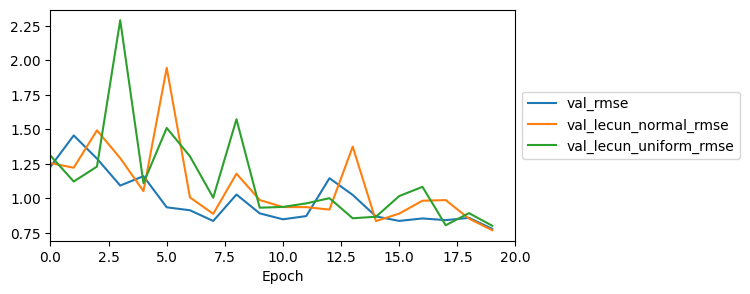

In [12]:
# Visualize RMSE

rmse_reg[['val_rmse', 'val_lecun_normal_rmse', 'val_lecun_uniform_rmse']].plot(figsize=(6, 3), xlim=[0, num_epochs_reg], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

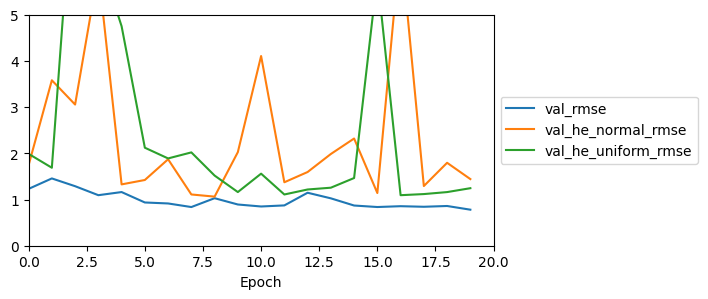

In [13]:
# Visualize RMSE

rmse_reg[['val_rmse', 'val_he_normal_rmse', 'val_he_uniform_rmse']].plot(figsize=(6, 3), xlim=[0, num_epochs_reg], ylim=[0,5], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
     

##Classification

In [14]:
# Read dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Split into train into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [15]:
num_epochs_classi = 10
acc_classi = pd.DataFrame()

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

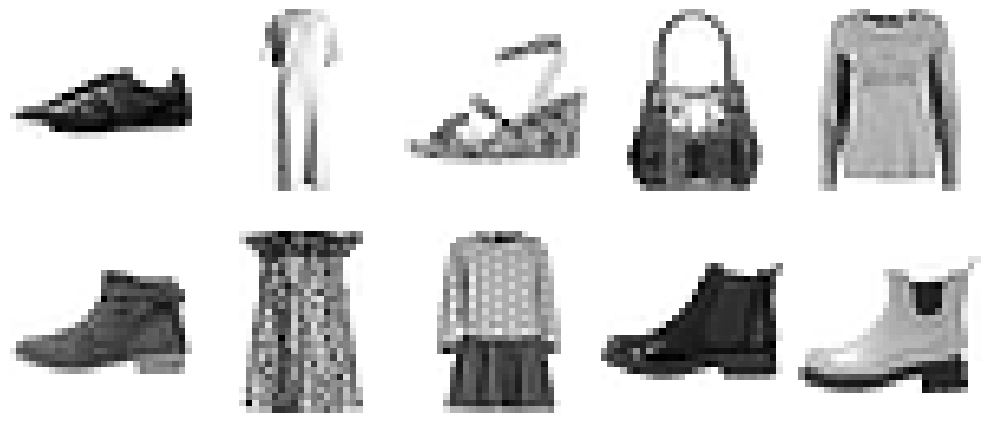

In [17]:
# Training images

num_images = 10
images = X_train.take(num_images)

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_train[i], cmap='binary')
  ax.axis('off')
plt.tight_layout()
plt.show()

In [18]:
# Reshape and Normalize pixels in images 

X_train, X_val, X_test = X_train.reshape(-1, 28, 28, 1) /255.0, X_val.reshape(-1, 28, 28, 1) /255.0, X_test.reshape(-1, 28, 28, 1) /255.0

In [19]:
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
# Model with default initialization - glorot/xavier uniform

model_classi = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_classi.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_classi = model_classi.fit(X_train, y_train, epochs=num_epochs_classi, validation_data=(X_val, y_val))

acc_classi = pd.concat([acc_classi, pd.DataFrame(history_classi.history)[['accuracy', 'val_accuracy']]], axis=1).rename(
    columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'})

Epoch 1/10
1500/1500 [==============================] - 14s 5ms/step - loss: 0.4674 - accuracy: 0.8295 - val_loss: 0.3701 - val_accuracy: 0.8648
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3159 - accuracy: 0.8845 - val_loss: 0.2980 - val_accuracy: 0.8897
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2664 - accuracy: 0.9024 - val_loss: 0.2758 - val_accuracy: 0.8990
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2330 - accuracy: 0.9138 - val_loss: 0.2549 - val_accuracy: 0.9063
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2049 - accuracy: 0.9236 - val_loss: 0.2631 - val_accuracy: 0.9028
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1840 - accuracy: 0.9314 - val_loss: 0.2560 - val_accuracy: 0.9053
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1633 - accuracy: 0.9382 - val_loss: 0.2611 - val_accuracy

In [21]:
# Model with Normal initialization

model_classi_normal = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1)),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_classi_normal.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_classi_normal = model_classi_normal.fit(X_train, y_train, epochs=num_epochs_classi, validation_data=(X_val, y_val))

acc_classi = pd.concat([acc_classi, pd.DataFrame(history_classi_normal.history)[['accuracy', 'val_accuracy']]], axis=1).rename(
    columns={'accuracy':'train_normal_acc', 'val_accuracy':'val_normal_acc'})

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 37.4738 - accuracy: 0.6925 - val_loss: 14.8383 - val_accuracy: 0.7529
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 10.5716 - accuracy: 0.7818 - val_loss: 7.5364 - val_accuracy: 0.7964
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 5.3804 - accuracy: 0.7979 - val_loss: 4.5253 - val_accuracy: 0.7739
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 2.6137 - accuracy: 0.8025 - val_loss: 1.8746 - val_accuracy: 0.7912
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0671 - accuracy: 0.8021 - val_loss: 1.0108 - val_accuracy: 0.7847
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6656 - accuracy: 0.8077 - val_loss: 0.7136 - val_accuracy: 0.7945
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5562 - accuracy: 0.8178 - val_loss: 0.6200 - val_accura

In [22]:
# Model with Xavier normal/ glorot initialization

model_classi_xavier = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), kernel_initializer='glorot_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_classi_xavier.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_classi_xavier = model_classi_xavier.fit(X_train, y_train, epochs=num_epochs_classi, validation_data=(X_val, y_val))

acc_classi = pd.concat([acc_classi, pd.DataFrame(history_classi_xavier.history)[['accuracy', 'val_accuracy']]], axis=1).rename(
    columns={'accuracy':'train_xavier_acc', 'val_accuracy':'val_xavier_acc'})

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4760 - accuracy: 0.8277 - val_loss: 0.3647 - val_accuracy: 0.8627
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3208 - accuracy: 0.8823 - val_loss: 0.3353 - val_accuracy: 0.8798
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2710 - accuracy: 0.9002 - val_loss: 0.2877 - val_accuracy: 0.8932
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2377 - accuracy: 0.9110 - val_loss: 0.2672 - val_accuracy: 0.9012
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2114 - accuracy: 0.9208 - val_loss: 0.2632 - val_accuracy: 0.9041
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1886 - accuracy: 0.9295 - val_loss: 0.2600 - val_accuracy: 0.9072
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1662 - accuracy: 0.9373 - val_loss: 0.2665 - val_accuracy:

In [23]:
acc_classi
     

,train_acc,val_acc,train_normal_acc,val_normal_acc,train_xavier_acc,val_xavier_acc
0,0.829479,0.864750,0.692479,0.752917,0.827708,0.862667
1,0.884500,0.889667,0.781833,0.796417,0.882333,0.879833
2,0.902396,0.899000,0.797854,0.773917,0.900167,0.893167
3,0.913771,0.906333,0.802521,0.791167,0.911021,0.901167
4,0.923583,0.902750,0.802125,0.784667,0.920792,0.904083
5,0.931396,0.905250,0.807729,0.794500,0.929521,0.907167
6,0.938229,0.907583,0.817833,0.810917,0.937292,0.908667
7,0.946792,0.914417,0.827750,0.812583,0.946417,0.912583
8,0.952271,0.913667,0.834854,0.829917,0.950646,0.911417
9,0.958354,0.916250,0.844583,0.836333,0.958167,0.907750


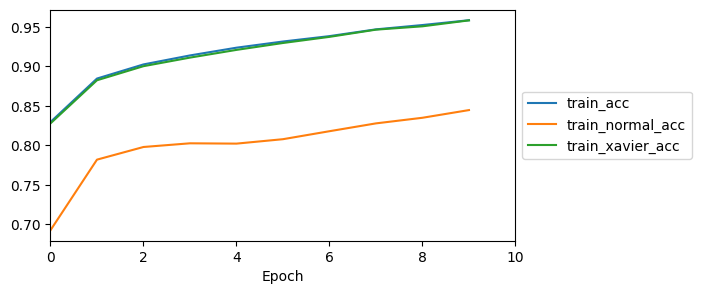

In [24]:
# Visualize accuracy

acc_classi[['train_acc', 'train_normal_acc', 'train_xavier_acc']].plot(figsize=(6, 3), xlim=[0, num_epochs_classi], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

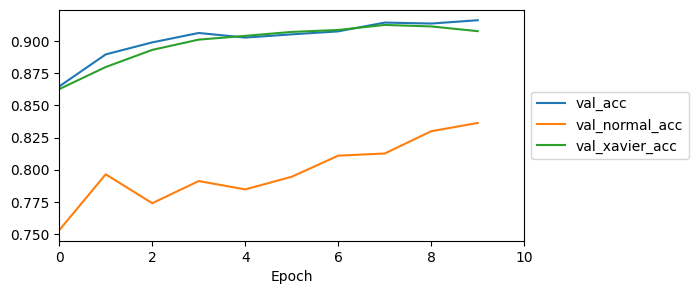

In [25]:
# Visualize accuracy

acc_classi[['val_acc', 'val_normal_acc', 'val_xavier_acc']].plot(figsize=(6, 3), xlim=[0, num_epochs_classi], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()